# ISS images intervals

In [1]:
from datetime import datetime as dt

import numpy as np
import matplotlib.pyplot as plt

from cassini import ISS

from titan import orbit as titan_orbit

In [2]:
imgs = np.loadtxt('IMG_list.dat', dtype=str)

In [3]:
t = []
for img_id in imgs:
    t.append(ISS(img_id).dtime)

t = np.asarray(t)

In [4]:
intervals = t[1:] - t[:-1]

In [5]:
xx = []
yy = []
for i, interval in enumerate(intervals):
    if interval.days > 0:
        xx.append(.5 * (t[i+1].timestamp() + t[i].timestamp()))
        yy.append(interval.days)
        
yy = np.asarray(yy)

In [6]:
mean = np.mean(yy)
median = np.median(yy)
ymin = np.min(yy)
ymax = np.max(yy)
q1 = np.percentile(yy, 25)
q3 = np.percentile(yy, 75)

print(f"""ISS images stats:
    Size: {len(t)}
    Mean: {mean:.1f}
    Median: {median:.1f}
    Min|Max: {ymin}|{ymax}
    1st|3rd Quartiles: {q1}|{q3}
""")

ISS images stats:
    Size: 139
    Mean: 39.3
    Median: 18.0
    Min|Max: 1|302
    1st|3rd Quartiles: 7.0|50.25



In [7]:
def timestamp(ls):
    """Calculate timestamp for Ls value."""
    time = str(titan_orbit.date(ls, Ty=(0 if ls > 180 else 1)))
    return dt.strptime(time, '%Y-%m-%d').timestamp()

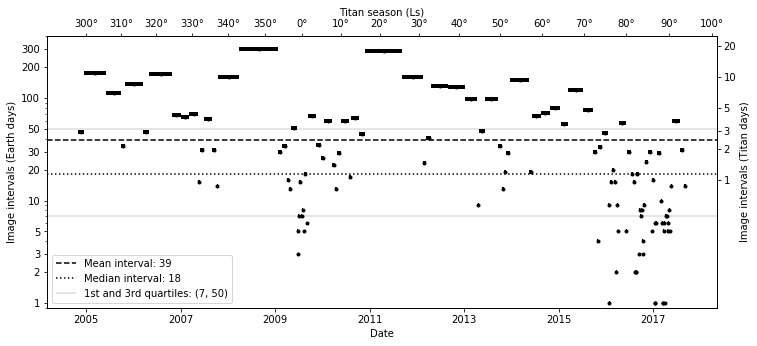

In [8]:
yticks = [1, 2, 3, 5, 10, 20, 30, 50, 100, 200, 300]
yticks1 = [1, 2, 3, 5, 10, 20]
xticks = np.arange(2005, 2019, 2)
xticks2 = list(range(300, 360, 10)) + list(range(0, 110, 10))

plt.figure(figsize=(12, 5))
ax = plt.gca()
ax.set_yscale('log')

ax.errorbar(xx, yy, xerr=(yy / 2 * 86400), color='k', fmt='.', lw=4)
xlim = ax.get_xlim()
ylim = (.9, ax.get_ylim()[1])

plt.plot(xlim, [mean, mean], 'k--', label=f'Mean interval: {int(mean)}')
plt.plot(xlim, [median, median], 'k:', label=f'Median interval: {int(median)}')
plt.plot(xlim, [q1, q1], 'k-', lw=.2, label=f'1st and 3rd quartiles: {int(q1), int(q3)}')
plt.plot(xlim, [q3, q3], 'k-', lw=.2)

plt.legend(loc=3, numpoints=1)

ax.set_xticks([dt(year, 1, 1).timestamp() for year in xticks])
ax.set_xticklabels(xticks)

ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

ax.set_xlim(*xlim)
ax.set_ylim(*ylim)

ax.set_xlabel('Date')
ax.set_ylabel('Image intervals (Earth days)')

ax1 = ax.twinx()
ax1.set_yscale('log')
ax1.set_ylim(*ylim)
ax1.set_yticks(np.multiply([1, 2, 3, 5, 10, 20], 16))
ax1.set_yticklabels(yticks1)
ax1.minorticks_off()
ax1.set_ylabel('Image intervals (Titan days)')

ax2 = ax.twiny()
ax2.set_xlim(*xlim)
ax2.set_xticks([timestamp(ls) for ls in xticks2])
ax2.set_xticklabels([f'{ls}°' for ls in xticks2])
ax2.set_xlabel('Titan season (Ls)');

plt.savefig('IMG_interval.png', bbox_inches='tight', transparent=True, dpi=300);